## Time Series Analysis

In [1]:
# require packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm


In [3]:
df = sm.datasets.sunspots.load_pandas().data
print(df.head())

     YEAR  SUNACTIVITY
0  1700.0          5.0
1  1701.0         11.0
2  1702.0         16.0
3  1703.0         23.0
4  1704.0         36.0


In [4]:
# change the index to the time component (YEAR)
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
print(df.head())

              YEAR  SUNACTIVITY
1700-12-31  1700.0          5.0
1701-12-31  1701.0         11.0
1702-12-31  1702.0         16.0
1703-12-31  1703.0         23.0
1704-12-31  1704.0         36.0


In [5]:
# remove the year
del df['YEAR']

In [6]:
print(df.head())

            SUNACTIVITY
1700-12-31          5.0
1701-12-31         11.0
1702-12-31         16.0
1703-12-31         23.0
1704-12-31         36.0


<AxesSubplot:>

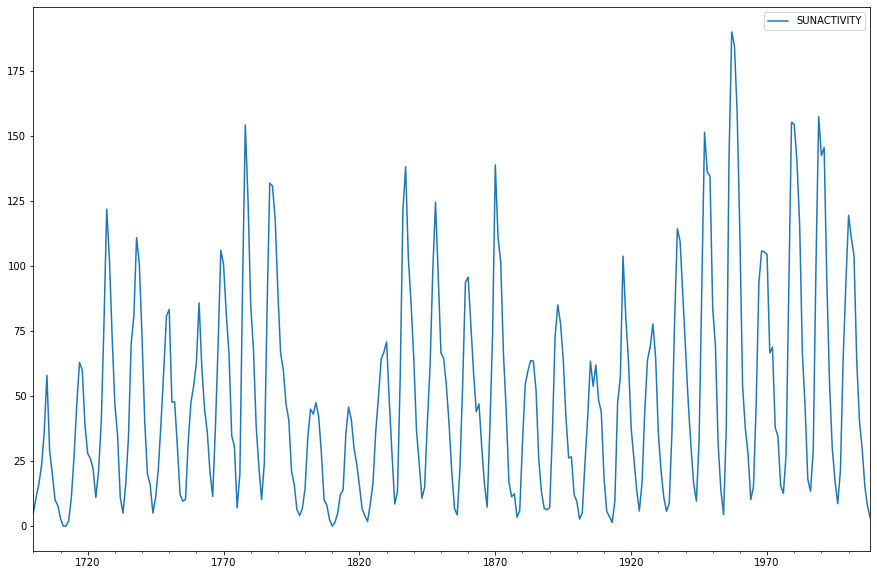

In [9]:
df.plot(figsize=(15, 10))

### ARIMA

In [10]:
from statsmodels.tsa.arima.model import ARIMA

In [16]:
# create the ARIMA model
model = ARIMA(df, order=(3, 0, 0)).fit()

/Library/Python/3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/Library/Python/3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'
/Library/Python/3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  warnings.warn('No frequency information was'


In [17]:
print(model.params)

const      49.751912
ar.L1       1.300818
ar.L2      -0.508102
ar.L3      -0.129644
sigma2    270.101140
dtype: float64


In [19]:
print(model.resid)

1700-12-31   -44.751912
1701-12-31    -1.905958
1702-12-31   -10.688068
1703-12-31    -8.338582
1704-12-31    -1.125931
                ...    
2004-12-31     8.008203
2005-12-31     6.333221
2006-12-31   -11.541552
2007-12-31    -8.656203
2008-12-31   -12.032428
Length: 309, dtype: float64


In [21]:
from statsmodels.graphics.api import qqplot

1700-12-31   -44.751912
1701-12-31    -1.905958
1702-12-31   -10.688068
1703-12-31    -8.338582
1704-12-31    -1.125931
                ...    
2004-12-31     8.008203
2005-12-31     6.333221
2006-12-31   -11.541552
2007-12-31    -8.656203
2008-12-31   -12.032428
Length: 309, dtype: float64


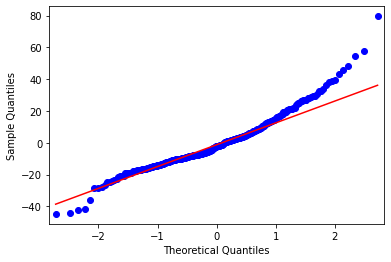

In [35]:
plot = qqplot(model.resid, line='q')
print(model.resid)

### predict the future values

In [34]:
prediction = model.predict('2009', '2020')
print(prediction)

2009-12-31    14.753858
2010-12-31    33.509098
2011-12-31    52.479638
2012-12-31    66.090489
2013-12-31    71.725244
2014-12-31    69.679910
2015-12-31    62.391704
2016-12-31    53.219803
2017-12-31    45.257151
2018-12-31    40.504329
2019-12-31    39.556698
2020-12-31    41.771235
Freq: A-DEC, Name: predicted_mean, dtype: float64


In [30]:
prediction = model.predict('2010')
print(prediction)

2010-12-31    33.509098
Freq: A-DEC, dtype: float64


In [31]:
prediction = model.predict('2011')
print(prediction)

2011-12-31    52.479638
Freq: A-DEC, dtype: float64
